## Forecast by Smoothing

We use AirPassenger as our dataset. We will use two methods to forecast upcoming monthes. 

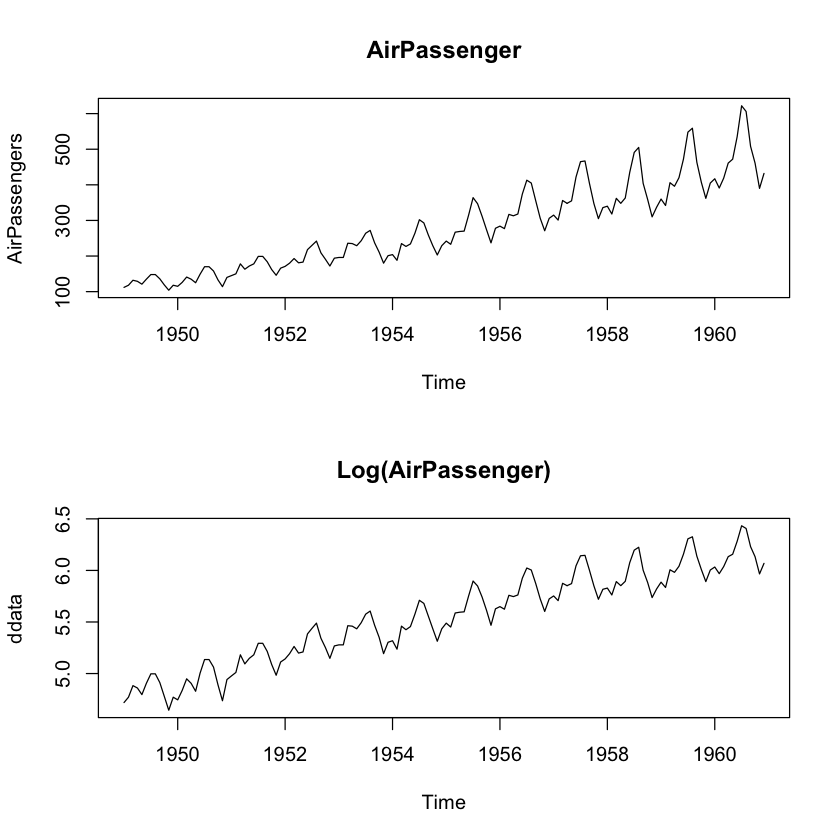

In [9]:
par(mfcol=c(2,1))
plot(AirPassengers, main="AirPassenger")
ddata = log(AirPassengers)
plot(ddata, main="Log(AirPassenger)")

In [13]:
model <- HoltWinters(ddata)
model

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = ddata)

Smoothing parameters:
 alpha: 0.3266015
 beta : 0.005744138
 gamma: 0.8206654

Coefficients:
            [,1]
a    6.172308435
b    0.008981893
s1  -0.073201087
s2  -0.140973564
s3  -0.036703294
s4   0.014522733
s5   0.032554237
s6   0.154873570
s7   0.294317062
s8   0.276063997
s9   0.088237657
s10 -0.032657089
s11 -0.198012716
s12 -0.102863837

In [15]:
model$coefficients

a            b           s1           s2           s3           s4 
 6.172308435  0.008981893 -0.073201087 -0.140973564 -0.036703294  0.014522733 
          s5           s6           s7           s8           s9          s10 
 0.032554237  0.154873570  0.294317062  0.276063997  0.088237657 -0.032657089 
         s11          s12 
-0.198012716 -0.102863837

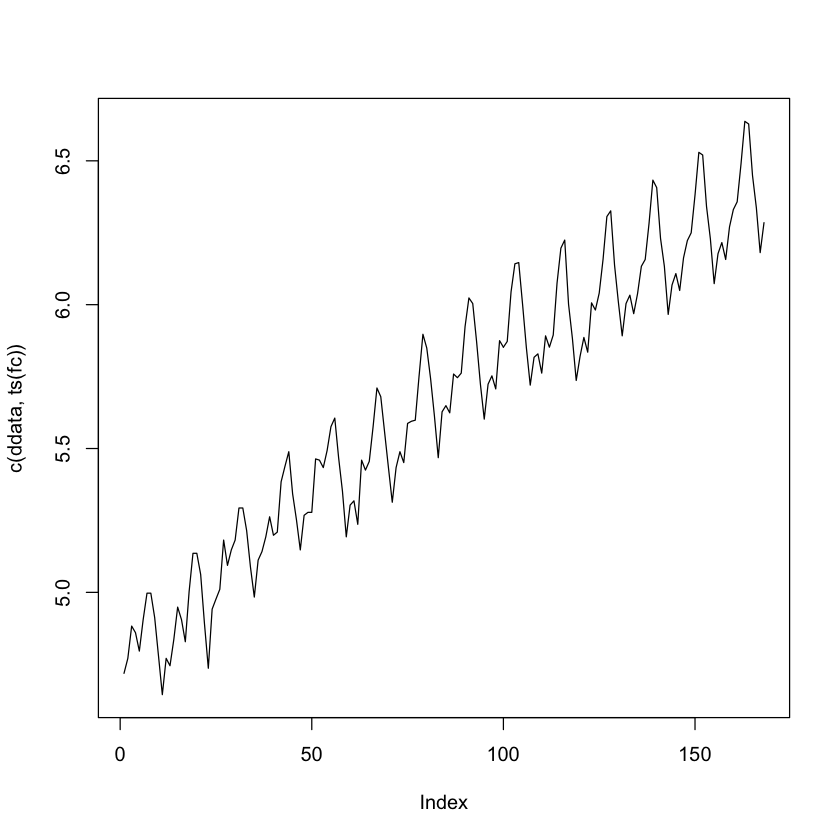

In [32]:
fc = NULL
idx = 0
a = model$coefficients[1]
b = model$coefficients[2]
s = model$coefficients[c(3:14)]
for (i in 1:2){
    for (j in 1:12){
        idx = (i-1) * 12 + j
        fc[idx] = a + idx*b + s[j]
    }
}
plot(c(ddata, ts(fc)), type='l')

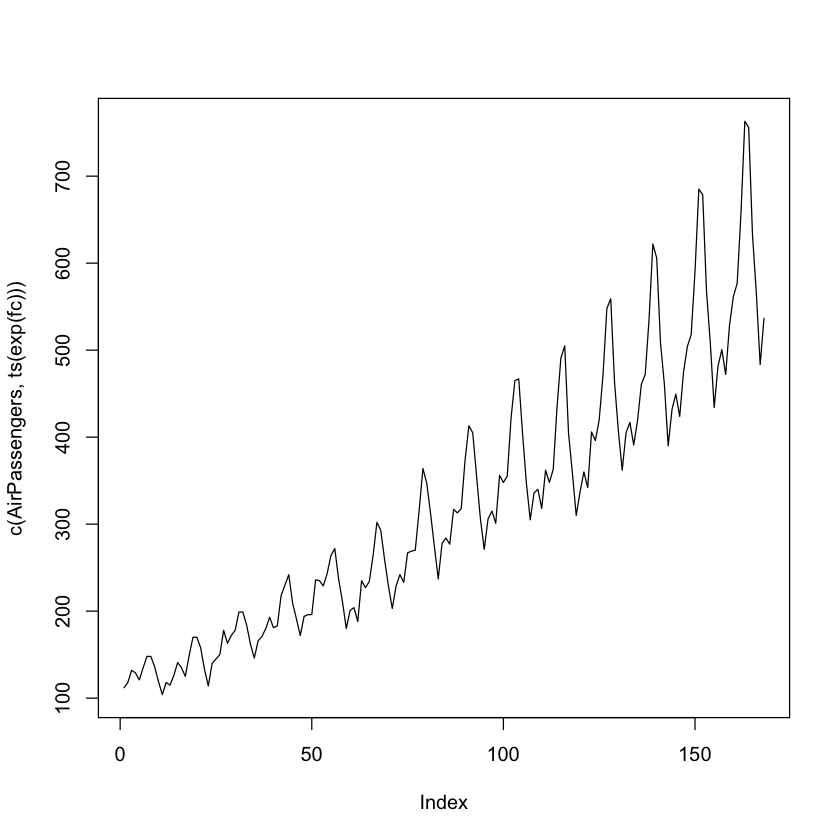

In [38]:
plot(c(AirPassengers, ts(exp(fc))), type='l')

In [39]:
fc

[1] 6.108089 6.049299 6.162551 6.222759 6.249772 6.381073 6.529499 6.520228
 [9] 6.341383 6.229470 6.073097 6.177227 6.215872 6.157081 6.270334 6.330541
[17] 6.357555 6.488856 6.637281 6.628010 6.449166 6.337253 6.180879 6.285010

In [44]:
library(forecast)

In [47]:
forecast(model)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       6.108089 6.057867 6.158312 6.031281 6.184898
Feb 1961       6.049299 5.996436 6.102161 5.968452 6.130145
Mar 1961       6.162551 6.107146 6.217956 6.077816 6.247285
Apr 1961       6.222759 6.164896 6.280622 6.134265 6.311252
May 1961       6.249772 6.189525 6.310019 6.157633 6.341912
Jun 1961       6.381073 6.318508 6.443638 6.285388 6.476758
Jul 1961       6.529499 6.464674 6.594324 6.430357 6.628640
Aug 1961       6.520228 6.453195 6.587261 6.417709 6.622746
Sep 1961       6.341383 6.272189 6.410577 6.235560 6.447206
Oct 1961       6.229470 6.158159 6.300782 6.120408 6.338532
Nov 1961       6.073097 5.999706 6.146487 5.960855 6.185338
Dec 1961       6.177227 6.101793 6.252662 6.061861 6.292594
Jan 1962       6.215872 6.127887 6.303857 6.081311 6.350433
Feb 1962       6.157081 6.067348 6.246815 6.019846 6.294317
Mar 1962       6.270334 6.178867 6.361800 6.130447 6.410220
Apr 1962       6.330541 6.237356 6.42372

In [48]:
ddata

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950,4.744932,4.836282,4.948760,4.905275,4.828314,5.003946,5.135798,5.135798,5.062595,4.890349,4.736198,4.941642
1951,4.976734,5.010635,5.181784,5.093750,5.147494,5.181784,5.293305,5.293305,5.214936,5.087596,4.983607,5.111988
1952,5.141664,5.192957,5.262690,5.198497,5.209486,5.384495,5.438079,5.488938,5.342334,5.252273,5.147494,5.267858
1953,5.278115,5.278115,5.463832,5.459586,5.433722,5.493061,5.575949,5.605802,5.468060,5.351858,5.192957,5.303305
1954,5.318120,5.236442,5.459586,5.424950,5.455321,5.575949,5.710427,5.680173,5.556828,5.433722,5.313206,5.433722
1955,5.488938,5.451038,5.587249,5.594711,5.598422,5.752573,5.897154,5.849325,5.743003,5.613128,5.468060,5.627621
1956,5.648974,5.624018,5.758902,5.746203,5.762051,5.924256,6.023448,6.003887,5.872118,5.723585,5.602119,5.723585
1957,5.752573,5.707110,5.874931,5.852202,5.872118,6.045005,6.142037,6.146329,6.001415,5.849325,5.720312,5.817111
1958,5.828946,5.762051,5.891644,5.852202,5.894403,6.075346,6.196444,6.224558,6.001415,5.883322,5.736572,5.820083
